**November 6, 2018**  
**ATMOS 5020**

# Plotting Geospatial Data

The GOES-16 satellite is arguably most exciting weather-observing platform to ever occur.

In this exercise, you will download and plot data from the GOES-16 Advanced Baseline Imager (ABI).

Many geospatial datasets are stored in a format known as NetCDF.

The GOES-16 file used in this example was downloaded from http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_pando.cgi?date=2018-10-10&domain=CONUS.

In [24]:
import xarray

import numpy as np
import matplotlib.pyplot as plt

In [6]:
FILE = './data/OR_ABI-L2-MCMIPC-M3_G16_s20182831437203_e20182831439576_c20182831440087.nc'
ABI = xarray.open_dataset(FILE)

`xarray` is a package capable of reading netCDF files and uses the `necdf4` package. Both packages must be installed. The contents of the file we named `ABI`. 

Print the contents of our new variable, ABI, and see what it contains.

In [7]:
ABI

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.128212 0.128156 ...
  * x                                       (x) float32 -0.101332 -0.101276 ...
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    band_wavelength_C02                     (band) float32 ...
    band_wavelength_C03                     (band) float32 ...
    band_wavelength_C04                     (band) float32 ...
    band_wavelength_C05                     (band) float32 ...
    band_wavelength_C06                     (band) float32 ...
    band_wavelength_C07                     (band) float32 ...
    band_wavelength_C08                     (band) float32 ...
    band

In [8]:
ABI['CMI_C01']

<xarray.DataArray 'CMI_C01' (y: 1500, x: 2500)>
[3750000 values with dtype=float32]
Coordinates:
    t        datetime64[ns] ...
  * y        (y) float32 0.128212 0.128156 0.12810001 0.12804401 0.12798801 ...
  * x        (x) float32 -0.101332 -0.101276 -0.101220004 -0.101164 ...
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:              ABI Cloud and Moisture Imagery reflectance factor
    standard_name:          toa_lambertian_equivalent_albedo_multiplied_by_co...
    sensor_band_bit_depth:  10
    downsampling_method:    average
    valid_range:            [   0 4095]
    units:                  1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: sum (interval: 0.000028 rad)
    ancillary_variables:    DQF_C01

In [20]:
ABI['CMI_C01']

<xarray.DataArray 'CMI_C01' (y: 1500, x: 2500)>
array([[     nan,      nan,      nan, ..., 0.526031, 0.51619 , 0.540317],
       [     nan,      nan,      nan, ..., 0.496825, 0.470158, 0.49492 ],
       [     nan,      nan,      nan, ..., 0.499365, 0.503809, 0.48    ],
       ...,
       [0.103492, 0.100635, 0.099365, ..., 0.102857, 0.103492, 0.100635],
       [0.101587, 0.10127 , 0.098413, ..., 0.105714, 0.098413, 0.099048],
       [0.104127, 0.103492, 0.098413, ..., 0.10254 , 0.1     , 0.097778]],
      dtype=float32)
Coordinates:
    t        datetime64[ns] ...
  * y        (y) float32 0.128212 0.128156 0.12810001 0.12804401 0.12798801 ...
  * x        (x) float32 -0.101332 -0.101276 -0.101220004 -0.101164 ...
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:              ABI Cloud and Moisture Imagery reflectance factor
    standard_name:          toa_lambertian_equivalent_albedo_multiplied_by_co...
    sensor_band_bit_depth:  10
    downsampling_method: 

Text(0.5,1,'ABI Cloud and Moisture Imagery reflectance factor')

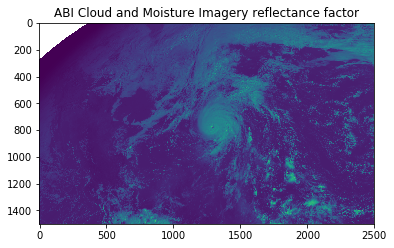

In [13]:
plt.imshow(ABI['CMI_C01'])
plt.title(ABI['CMI_C01'].long_name)


# Color Images
Color images on a screen are made of _Red_, _Green_, and _Blue_ light. If you don't believe me, check out this video: https://youtu.be/3BJU2drrtCM?t=446.

<img src="./images/rgb.png" width=100px>

Satellites measure light at different wavelengths, and each wavelength can be combined, or composited, to make different RGB images.

When the R, G, and B values are the same, you get shades of grey, like the grey-scale image shown below. This is becuase channel `01` are assigned to the R, G, and B value. Color images are generated when RGB are different. 

> #### Question: What channel combination will create a "true color" image?
> Channels 1 and 2 are visible channels. Channel 3 is a near infrared sensitive to vegetation. Experiment with different channel combinations to generate an RGB Image that resenmbles what you would expect to "see" from a satellite.
>
    # instead of xx, insert 01, 02, or 03
    R = ABI['CMI_Cxx']  
    G = ABI['CMI_Cxx']  
    B = ABI['CMI_Cxx']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cm.py:255: RuntimeWarning: invalid value encountered in less
  if norm and xx.max() > 1 or xx.min() < 0:


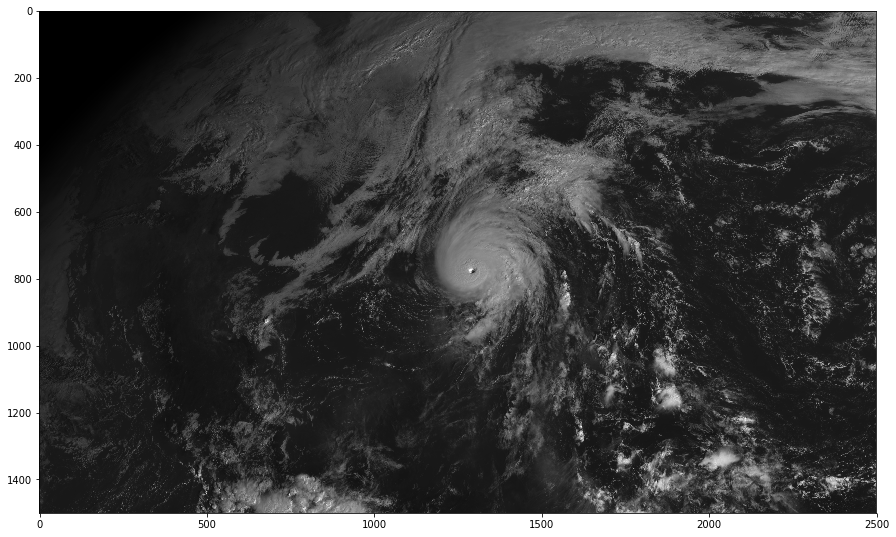

In [159]:
R = ABI['CMI_C01']
G = ABI['CMI_C01']
B = ABI['CMI_C01']

RGB = np.dstack([R, G, B])

plt.figure(figsize=(15,10))
plt.imshow(RGB)

In [162]:
R

<xarray.DataArray 'CMI_C01' (y: 1500, x: 2500)>
array([[     nan,      nan,      nan, ..., 0.526031, 0.51619 , 0.540317],
       [     nan,      nan,      nan, ..., 0.496825, 0.470158, 0.49492 ],
       [     nan,      nan,      nan, ..., 0.499365, 0.503809, 0.48    ],
       ...,
       [0.103492, 0.100635, 0.099365, ..., 0.102857, 0.103492, 0.100635],
       [0.101587, 0.10127 , 0.098413, ..., 0.105714, 0.098413, 0.099048],
       [0.104127, 0.103492, 0.098413, ..., 0.10254 , 0.1     , 0.097778]],
      dtype=float32)
Coordinates:
    t        datetime64[ns] ...
  * y        (y) float32 0.128212 0.128156 0.12810001 0.12804401 0.12798801 ...
  * x        (x) float32 -0.101332 -0.101276 -0.101220004 -0.101164 ...
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:              ABI Cloud and Moisture Imagery reflectance factor
    standard_name:          toa_lambertian_equivalent_albedo_multiplied_by_co...
    sensor_band_bit_depth:  10
    downsampling_method: 

In [169]:
# Apply a gammer correction, by scaling the RGB values by a power of 0.4
R = ABI['CMI_C02']
G = ABI['CMI_C03']
B = ABI['CMI_C01']

RGB = np.dstack([R, G, B])**.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cm.py:255: RuntimeWarning: invalid value encountered in less
  if norm and xx.max() > 1 or xx.min() < 0:


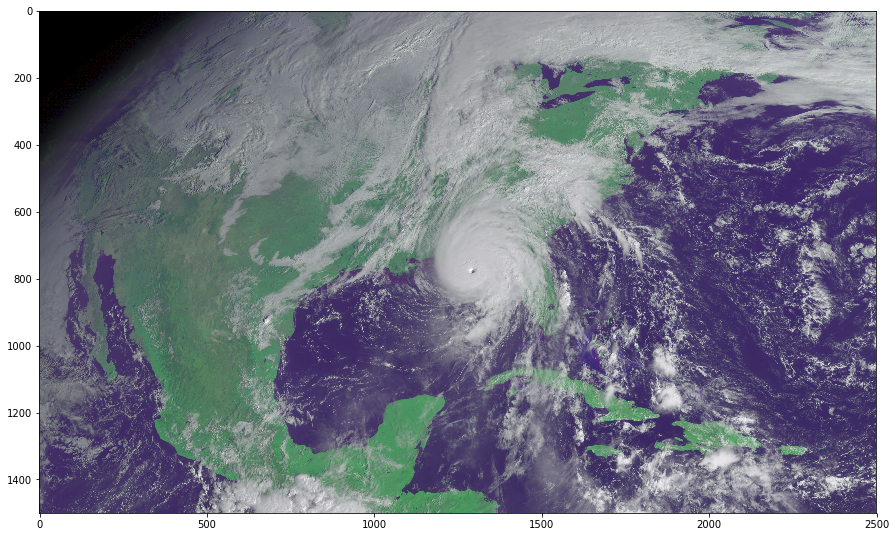

In [170]:
plt.figure(figsize=(15,10))
plt.imshow(RGB)

The green channel actually doesn't measure "Green" light, rather, it measures a wavelenth that is senstive to vegetation.

It is common to simulate the "true green" color with a simple interpolaiton. (See recipe: http://cimss.ssec.wisc.edu/goes/OCLOFactSheetPDFs/ABIQuickGuide_CIMSSRGB_v2.pdf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cm.py:255: RuntimeWarning: invalid value encountered in less
  if norm and xx.max() > 1 or xx.min() < 0:


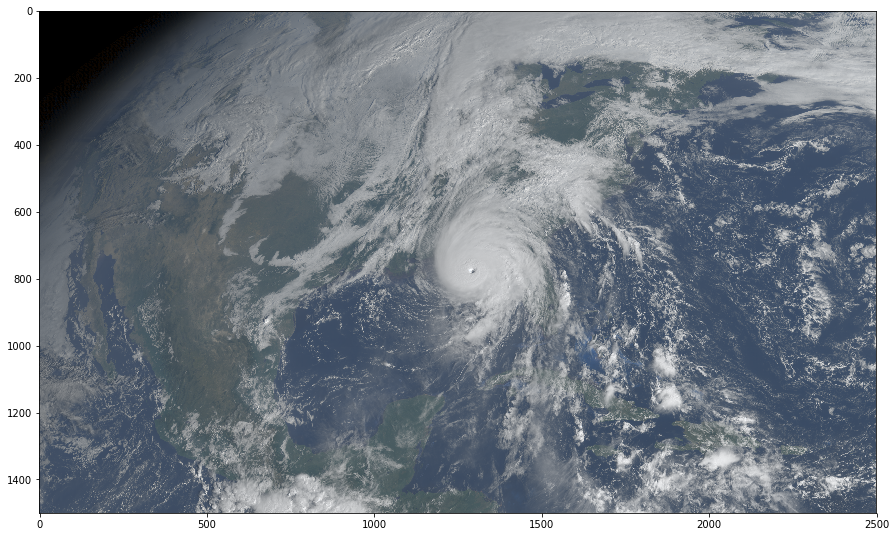

In [151]:
true_G = 0.45 * R + 0.45 * B + 0.1 * G
true_G = np.maximum(true_G, 0)
true_G = np.minimum(true_G, 1)

RGB_veggie = np.dstack([R, true_G, B])

plt.figure(figsize=(15,10))
plt.imshow(RGB_veggie)


<xarray.DataArray ()>
array(0.)
Coordinates:
    t        datetime64[ns] 2018-10-10T14:38:38.980061952
    y_image  float32 0.08624
    x_image  float32 -0.03136

In [122]:
for i in range(1,17):
    print(i, ABI['band_wavelength_C%02d' % i].data[0])

1 0.47
2 0.64
3 0.865
4 1.378
5 1.61
6 2.25
7 3.89
8 6.17
9 6.93
10 7.34
11 8.44
12 9.61
13 10.33
14 11.19
15 12.27
16 13.27


# Extra Practice: Advanced GOES-16 RGB Composites

Can you follow the RGB recipe to create the convective cloud product??
- http://rammb.cira.colostate.edu/training/visit/quick_guides/QuickGuide_GOESR_DayConvectionRGB_final.pdf

You can get the ABI channel number for each wavelength in the file's metadata (`ABI['band_wavelength_Cxx].data`) or by looking at this online guide: https://www.goes-r.gov/education/ABI-bands-quick-info.html


Text(0.5,1,'Daytime Convective Product')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cm.py:255: RuntimeWarning: invalid value encountered in less
  if norm and xx.max() > 1 or xx.min() < 0:


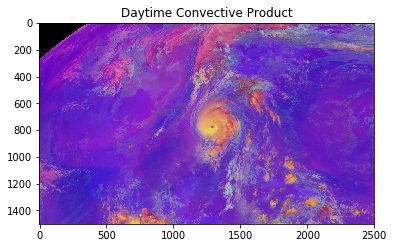

In [152]:
R_c = ABI['CMI_C08']-ABI['CMI_C10']
G_c = ABI['CMI_C07']-ABI['CMI_C13']
B_c = ABI['CMI_C05']-ABI['CMI_C02']

# Adjust the min and max limits
R_c = np.maximum(R_c, -35)
G_c = np.maximum(G_c, -5)
B_c = np.maximum(B_c, -0.75)

R_c = np.minimum(R_c, 5)
G_c = np.minimum(G_c, 60)
B_c = np.minimum(B_c, 0.25)

# Normalize values of each channel. RGB values must be between 0 and 1
R_c = (R_c-(-35))/(5-(-35))
G_c = (G_c-(-5))/(60-(-5))
B_c = (B_c-(-.75))/(.25-(-.75))


RGB_convective = np.dstack([R_c, G_c, B_c])

plt.imshow(RGB_convective)
plt.title('Daytime Convective Product')